# EXTRACTING RESUMES

In [21]:
import os
import pandas as pd
from zipfile import ZipFile
import docx2txt
import fitz  # PyMuPDF
import re
from pathlib import Path
zip_path=r'C:\Users\surya\Downloads\Resume-Classification\R-Zip.zip'
extract_path=r'C:\Users\surya\Downloads\Resume-Classification\Extract'
def extract_resumes(zip_path, extract_path):
    os.makedirs(extract_path, exist_ok=True)
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted files to {extract_path}")

In [22]:
def preprocess_text(text):
    text = re.sub(r'[^\x20-\x7E]', '', text)  # Remove non-printable characters
    text = re.sub(r'\s+', ' ', text)        # Normalize whitespace
    return text

In [23]:
def read_docx(file_path):
    try:
        text = docx2txt.process(file_path)
        return preprocess_text(text)
    except Exception as e:
        print(f"Error reading DOCX file: {file_path} - {e}")
        return ""  # Handle error by returning an empty string

In [24]:
def read_doc(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read()
            return preprocess_text(text)
    except Exception as e:
        print(f"Error reading DOC file: {file_path} - {e}")
        return ""  # Handle error by returning an empty string

In [25]:
def read_pdf(file_path):
    try:
        doc = fitz.open(file_path)
        text = ""
        for page in doc:
            text += page.get_text()
        return preprocess_text(text)
    except Exception as e:
        print(f"Error reading PDF file: {file_path} - {e}")
        return ""  # Handle error by returning an empty string

In [26]:
def create_dataset(root_dir):
    data = []
    for root, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.docx', '.pdf', '.doc')):
                full_path = os.path.join(root, file)
                if os.path.getsize(full_path) > 0:  # Check for non-empty files
                    text = ""
                    if file.endswith(".docx"):
                        text = read_docx(full_path)
                    elif file.endswith(".doc"):
                        text = read_doc(full_path)
                    elif file.endswith(".pdf"):
                        text = read_pdf(full_path)
                    category = Path(root).relative_to(root_dir).name
                    data.append({ 'Resumes': text, 'category': category})

    df = pd.DataFrame(data)
    return df

In [27]:
# Usage
zip_path=r'C:\Users\surya\Downloads\Resume-Classification\R-Zip.zip'
extract_path=r'C:\Users\surya\Downloads\Resume-Classification\Extract'
extract_resumes(zip_path, extract_path)

df = create_dataset(extract_path)
print(df)

Extracted files to C:\Users\surya\Downloads\Resume-Classification\Extract
                                              Resumes         category
0   Name: Ravali P Curriculum Vitae Specialization...          Resumes
1   SUSOVAN BAG Seeking a challenging position in ...          Resumes
2   Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...          Resumes
3   HARIPRIYA BATTINA Experience as UI Developer i...          Resumes
4   KAMALAKAR REDDY. A Linked In: https://www.link...          Resumes
..                                                ...              ...
74  >!9#bjbjb]b]4\7g7g+bb8@Lk&(((((kkkkkkk$mapn*k*...  workday resumes
75  Srikanth (WORKDAY hCM Consultant) Seeking suit...  workday resumes
76  WORKDAY | HCM | FCMName : Kumar S.SRole : Work...  workday resumes
77  >!6"bjbjb]b]4h7g7g`,,n-n-n----8-l&.-.....wXJXX...  workday resumes
78  Vinay kumar .vWorkday Functional ConsultantEXP...  workday resumes

[79 rows x 2 columns]


# Converting the Extracted Resumes to CSV File

In [28]:
df.to_csv('resumes.csv', index=False)

In [29]:
#Uploading the dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
#from wordcloud import WordCloud

Applying Text Processing On Dataframe

In [31]:
data = pd.read_csv("resumes.csv")
data

,Resumes,category
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes
...,...,...
74,>!9#bjbjb]b]4\7g7g+bb8@Lk&(((((kkkkkkk$mapn*k*...,workday resumes
75,Srikanth (WORKDAY hCM Consultant) Seeking suit...,workday resumes
76,WORKDAY | HCM | FCMName : Kumar S.SRole : Work...,workday resumes
77,">!6""bjbjb]b]4h7g7g`,,n-n-n----8-l&.-.....wXJXX...",workday resumes


In [32]:
def remove_pattern(text, pattern_regex):
  r = re.findall(pattern_regex, text)
  for i in r:
    text = re.sub(i, '', text)

  return text

Converting into clean resumes

In [33]:

import numpy as np



In [34]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'],'@[\w]*')
data.head()

,Resumes,category,Clean_Resumes
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes,KAMALAKAR REDDY. A Linked In: https://www.link...


In [35]:
#Removing URLs from Clean_Resumes
clean_Resumes = []
for index, row in data.iterrows():
  words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
  clean_Resumes.append(' '.join(words_without_links))
data['Clean_Resumes'] = clean_Resumes
data.head()

,Resumes,category,Clean_Resumes
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...


In [36]:
#removing spaces
data = data[data['Clean_Resumes']!='']
data.drop_duplicates(subset=['Clean_Resumes'], keep= False)
data = data.reset_index(drop=True)
data.head(10)

,Resumes,category,Clean_Resumes
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen SadhuTitle: software developer Location...,Resumes,Naveen SadhuTitle: software developer Location...
6,>}~!lbjbjb]b]LH7g7g**...dl8<B:||||2227777777$:...,Resumes,>}~!lbjbjb]b]LH7g7g**...dl8<B:||||2227777777$:...
7,PRAGNYA PATTNAIK Expertise: Having around 2 ye...,Resumes,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,"SARALA MADASUSARALA MADASU 204,Sri geethika pr...",Resumes,"SARALA MADASUSARALA MADASU 204,Sri geethika pr..."
9,Thirupathamma BallaSUMMARY:2.8 year of IT expe...,Resumes,Thirupathamma BallaSUMMARY:2.8 year of IT expe...


In [37]:
#Making text lowercase, removing text in square brackets, links, punctuation and remove words containing numbers

import string
def clean_text(text):
  text = text.lower()
  text = re.sub('!','', text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('⇨', '', text)
  text = re.sub(':', '', text)
  text = re.sub('•', '', text)
  text = re.sub('https?://\S+|www.\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

In [38]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head()

,Resumes,category,Clean_Resumes
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes,kanumuru deepak reddycareer objectiveto secure...
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes,kamalakar reddy a linked in professional summa...


In [39]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [40]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data

,Resumes,category,Clean_Resumes
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes,kanumuru deepak reddycareer objectiveto secure...
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes,kamalakar reddy a linked in professional summa...
...,...,...,...
74,>!9#bjbjb]b]4\7g7g+bb8@Lk&(((((kkkkkkk$mapn*k*...,workday resumes,integration consultantname sri krishna sprof...
75,Srikanth (WORKDAY hCM Consultant) Seeking suit...,workday resumes,srikanth workday hcm consultant seeking suitab...
76,WORKDAY | HCM | FCMName : Kumar S.SRole : Work...,workday resumes,workday hcm fcmname kumar ssrole workday c...
77,">!6""bjbjb]b]4h7g7g`,,n-n-n----8-l&.-.....wXJXX...",workday resumes,consultant having years of experience in it ...


Removing stop words from Clean_Resumes and Making it Absolute_Clean_Resumes


In [41]:
import nltk
from nltk.corpus import stopwords

In [42]:
my_stop_words = stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():

  words_without_stopwords = [word for word in row.Clean_Resumes.split() if word not in my_stop_words]

  cleaned_resumes.append(' '.join(words_without_stopwords))

data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,category,Clean_Resumes,Absolute_Clean_Resumes
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes,kanumuru deepak reddycareer objectiveto secure...,kanumuru deepak reddycareer objectiveto secure...
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...
5,Naveen SadhuTitle: software developer Location...,Resumes,naveen sadhutitle software developer location ...,naveen sadhutitle software developer location ...
6,>}~!lbjbjb]b]LH7g7g**...dl8<B:||||2227777777$:...,Resumes,d b iy ...,b iy ujamw l blmsueeuug b vzy xolebtd yd bb ye...
7,PRAGNYA PATTNAIK Expertise: Having around 2 ye...,Resumes,pragnya pattnaik expertise having around year...,pragnya pattnaik expertise around years experi...
8,"SARALA MADASUSARALA MADASU 204,Sri geethika pr...",Resumes,sarala madasusarala madasu geethika prestiger...,sarala madasusarala madasu geethika prestigero...
9,Thirupathamma BallaSUMMARY:2.8 year of IT expe...,Resumes,thirupathamma year of it experience as react ...,thirupathamma year experience react developer ...


In [43]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [name, ravali, p, curriculum, vitae, specializ...
1    [susovan, bag, seeking, challenging, position,...
2    [kanumuru, deepak, reddycareer, objectiveto, s...
3    [haripriya, battina, experience, ui, developer...
4    [kamalakar, reddy, linked, professional, summa...
5    [naveen, sadhutitle, software, developer, loca...
6    [b, iy, ujamw, l, blmsueeuug, b, vzy, xolebtd,...
7    [pragnya, pattnaik, expertise, around, years, ...
8    [sarala, madasusarala, madasu, geethika, prest...
9    [thirupathamma, year, experience, react, devel...
Name: Absolute_Clean_Resumes, dtype: object

Applying Lemmatization on Abosulte_Clean_Resumes

In [44]:
import nltk
from nltk.stem import WordNetLemmatizer

In [45]:
word_lemmatizer = WordNetLemmatizer()
Tokenized_Resume = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resume.head()

0    [name, ravali, p, curriculum, vitae, specializ...
1    [susovan, bag, seeking, challenging, position,...
2    [kanumuru, deepak, reddycareer, objectiveto, s...
3    [haripriya, battina, experience, ui, developer...
4    [kamalakar, reddy, linked, professional, summa...
Name: Absolute_Clean_Resumes, dtype: object

In [46]:
for i, tokens in enumerate(Tokenized_Resume):
  Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head()

,Resumes,category,Clean_Resumes,Absolute_Clean_Resumes
0,Name: Ravali P Curriculum Vitae Specialization...,Resumes,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging position in ...,Resumes,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
2,Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...,Resumes,kanumuru deepak reddycareer objectiveto secure...,kanumuru deepak reddycareer objectiveto secure...
3,HARIPRIYA BATTINA Experience as UI Developer i...,Resumes,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...
4,KAMALAKAR REDDY. A Linked In: https://www.link...,Resumes,kamalakar reddy a linked in professional summa...,kamalakar reddy linked professional summary ye...


In [47]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)
data

,category,Absolute_Clean_Resumes
0,Resumes,name ravali p curriculum vitae specialization ...
1,Resumes,susovan bag seeking challenging position field...
2,Resumes,kanumuru deepak reddycareer objectiveto secure...
3,Resumes,haripriya battina experience ui developer reac...
4,Resumes,kamalakar reddy linked professional summary ye...
...,...,...
74,workday resumes,integration consultantname sri krishna sprofes...
75,workday resumes,srikanth workday hcm consultant seeking suitab...
76,workday resumes,workday hcm fcmname kumar ssrole workday consu...
77,workday resumes,consultant year experience year experience imp...


# Exploratory Data Analysis (EDA)

**1. Understand the Data Structure**

In [48]:
# Check for missing values
print(data.isnull().sum())

category                  0
Absolute_Clean_Resumes    0
dtype: int64


In [49]:
# Check data types
print(data.dtypes)

category                  object
Absolute_Clean_Resumes    object
dtype: object


In [50]:
# Get unique values in the 'category' column
print(data['category'].unique())

['Resumes' 'Peoplesoft resumes' 'SQL Developer Lightning insight'
 'workday resumes']


**2. Analyze Text Data**

In [51]:
# Calculate word count and character count for each resume
data['word_count'] = data['Absolute_Clean_Resumes'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['Absolute_Clean_Resumes'].apply(lambda x: len(str(x)))

# Display summary statistics
print(data[['word_count', 'char_count']].describe())

        word_count    char_count
count    79.000000     79.000000
mean    337.329114   3002.607595
std     269.059079   2396.143319
min       2.000000     14.000000
25%     200.000000   1608.000000
50%     301.000000   2792.000000
75%     445.500000   3975.000000
max    1506.000000  13669.000000


**3. Text Visualization**



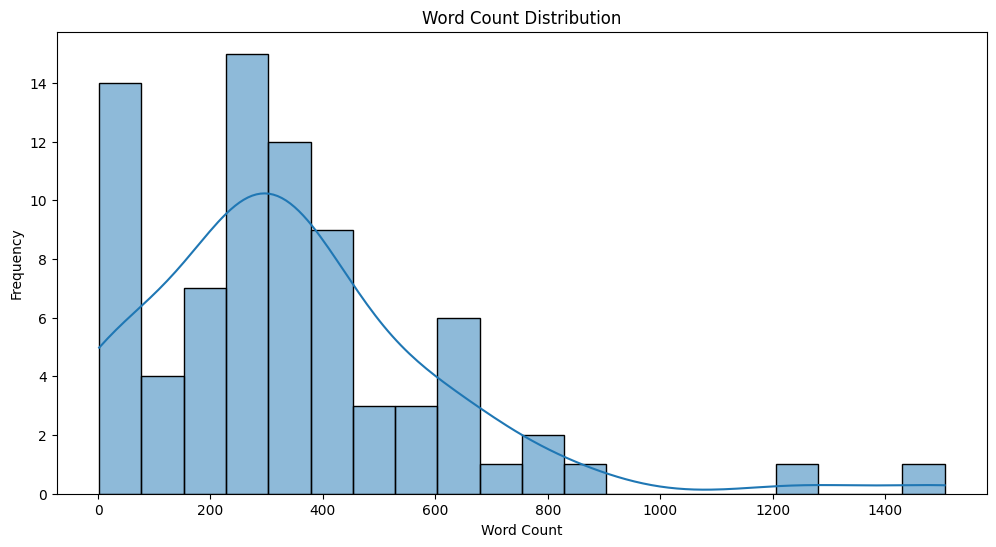

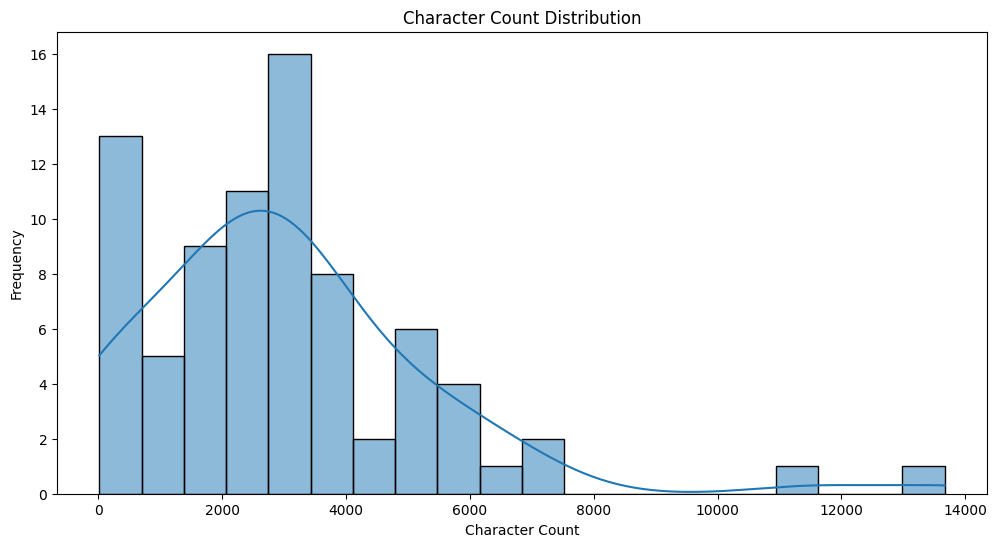

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot word count distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['word_count'], bins=20, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Plot character count distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['char_count'], bins=20, kde=True)
plt.title('Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


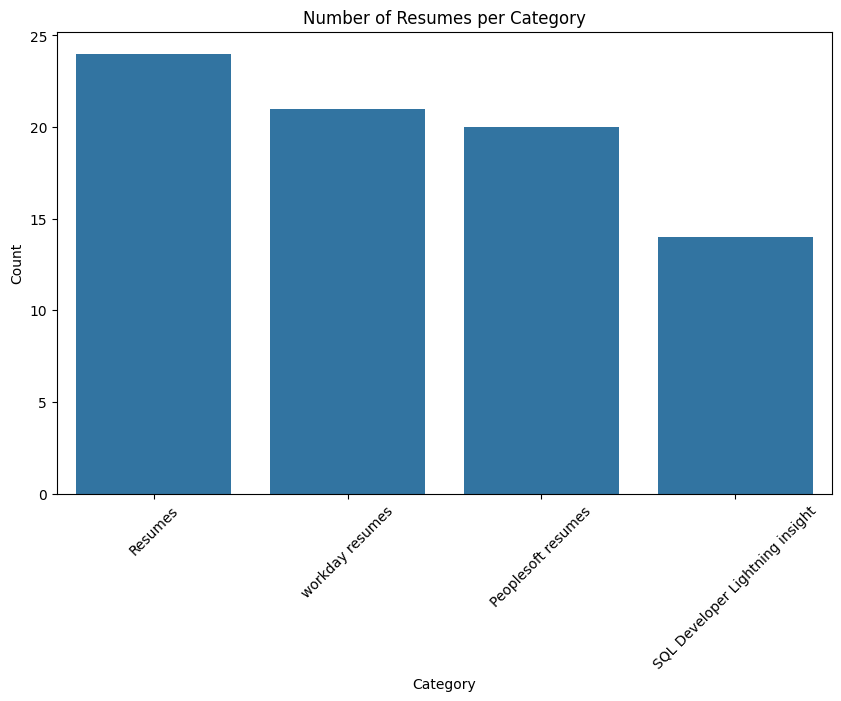

In [53]:
#Categorical Analysis:
# Count resumes per category
category_counts = data['category'].value_counts()

# Plot category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Resumes per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [54]:
oneSetofStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
  cleanedSentences += records
  required_words = nltk.word_tokenize(records)
  for word in required_words:
    if word not in oneSetofStopWords and word not in string.punctuation:
      totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)

In [55]:
wordfreqdist

FreqDist({'application': 307, 'report': 307, 'server': 299, 'using': 292, 'workday': 274, 'integration': 258, 'experience': 247, 'data': 211, 'business': 205, 'peoplesoft': 199, ...})

In [56]:
mostcommon

[('application', 307),
 ('report', 307),
 ('server', 299),
 ('using', 292),
 ('workday', 274),
 ('integration', 258),
 ('experience', 247),
 ('data', 211),
 ('business', 205),
 ('peoplesoft', 199),
 ('sql', 178),
 ('process', 175),
 ('web', 164),
 ('knowledge', 158),
 ('project', 146),
 ('system', 142),
 ('database', 138),
 ('like', 128),
 ('tool', 126),
 ('support', 115),
 ('service', 112),
 ('various', 109),
 ('hcm', 109),
 ('development', 106),
 ('eib', 105),
 ('requirement', 104),
 ('technology', 101),
 ('working', 99),
 ('people', 99),
 ('skill', 96),
 ('design', 95),
 ('creating', 94),
 ('client', 93),
 ('team', 91),
 ('core', 91),
 ('testing', 89),
 ('user', 89),
 ('studio', 89),
 ('security', 87),
 ('new', 87),
 ('work', 85),
 ('change', 84),
 ('custom', 84),
 ('j', 83),
 ('query', 83),
 ('code', 83),
 ('good', 82),
 ('year', 80),
 ('field', 80),
 ('production', 79),
 ('management', 78),
 ('connector', 78),
 ('technical', 77),
 ('react', 76),
 ('scheduler', 74),
 ('developer', 

**4. Generate a word cloud**

In [57]:
'''
all_words = ' '.join([text for text in data['Absolute_Clean_Resumes']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

#WordCLouds

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()'''

"\nall_words = ' '.join([text for text in data['Absolute_Clean_Resumes']])\nwordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)\n\n#WordCLouds\n\nwc = WordCloud().generate(cleanedSentences)\nplt.figure(figsize=(10,10))\nplt.imshow(wc, interpolation = 'bilinear')\nplt.axis('off')\nplt.show()"

In [58]:
categories = np.sort(data['category'].unique())
categories

array(['Peoplesoft resumes', 'Resumes', 'SQL Developer Lightning insight',
       'workday resumes'], dtype=object)

In [59]:
data_categories = [data[data['category'] == category].loc[:, ['Absolute_Clean_Resumes', 'category']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes            category
 24  anubhav kumar singhcore competenciesscripting ...  Peoplesoft resumes
 25  ojqj hi upzxxx cnntwxxsxlaga n nbpapkdrsdownre...  Peoplesoft resumes
 26  ojpjqjhmhnhshthvvnormalbphbb charcjojpjqjajw t...  Peoplesoft resumes
 27  classification internalclassification internal...  Peoplesoft resumes
 28  mountpleasant coonoorthe nilgiris career objec...  Peoplesoft resumes
 29  sirazuddin mbangalore indiasirazuddin mbangalo...  Peoplesoft resumes
 30  administratorsrinivask experience year experie...  Peoplesoft resumes
 31  peoplesoft adminvarkala vikascareer objectivei...  Peoplesoft resumes
 32  tupqrqrturchcjojqjajhcjojqjajhcjojqjajhhcjojqj...  Peoplesoft resumes
 33  paragraph charcjojpjqjajzoznormal verdanablabo...  Peoplesoft resumes
 34  peoplesoft administration vivekanand sayana ca...  Peoplesoft resumes
 35  hhhhhcjoj idif axdh ax axh axh ddefault paragr...  Peoplesoft resumes
 36                      

**5. Feature Extraction for NLP Modeling**



*   Bag of Words (BoW) / TF-IDF: Extracting features using BoW or TF-IDF.
*   Word Embeddings:pre-trained embeddings like Word2Vec, GloVe, or BERT for better context understanding.



In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Absolute_Clean_Resumes'])

# Convert to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

   abdul  abilitiescommunication  abilitiesgood  abilitiestelugu   ability  \
0    0.0                     0.0            0.0              0.0  0.000000   
1    0.0                     0.0            0.0              0.0  0.000000   
2    0.0                     0.0            0.0              0.0  0.000000   
3    0.0                     0.0            0.0              0.0  0.000000   
4    0.0                     0.0            0.0              0.0  0.042712   

   abovementioned  absence  absencehands  abstraction  abstractit  ...  \
0        0.039629      0.0           0.0     0.046503         0.0  ...   
1        0.000000      0.0           0.0     0.000000         0.0  ...   
2        0.000000      0.0           0.0     0.000000         0.0  ...   
3        0.071369      0.0           0.0     0.000000         0.0  ...   
4        0.000000      0.0           0.0     0.000000         0.0  ...   

   yonder  youll  young  youre  yoursincerely  zdrectangle  zealand  zero  \
0  0.0000

**6. Explore Relationships**

Investigating if certain keywords are associated with specific categories or job roles.

In [61]:
#Finding keywords most associated with each category
def get_top_keywords(data, n=10):
    # Create and fit TF-IDF vectorizer
    word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
    tfidf_matrix = word_vectorizer.fit_transform(data['Absolute_Clean_Resumes'])

    # Get feature names (words)
    feature_names = word_vectorizer.get_feature_names_out()

    # Create a DataFrame with TF-IDF scores
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=data['category'])

    # Sum the TF-IDF scores per category
    category_keywords = tfidf_df.groupby(level=0).mean()

    top_keywords = {}
    for category in category_keywords.index:
        top_keywords[category] = category_keywords.loc[category].sort_values(ascending=False).head(n)

    return top_keywords

In [62]:
# Get top keywords
top_keywords = get_top_keywords(data)

In [63]:
# Print top keywords for each category
for category, keywords in top_keywords.items():
    print(f"Category: {category}")
    for word, score in keywords.items():
        print(f"{word:<30} {score:.6f}")
    print("\n")

Category: Peoplesoft resumes
word                           0.127155
microsoft                      0.114328
peoplesoft                     0.070673
paragraph                      0.050458
people                         0.046811
text                           0.042816
application                    0.041732
fscm                           0.040686
server                         0.040458
oracle                         0.040181


Category: Resumes
react                          0.079199
javascript                     0.064009
html                           0.051308
bootstrap                      0.048581
ui                             0.047153
cs                             0.044502
project                        0.041841
using                          0.039845
technology                     0.039532
developer                      0.039225


Category: SQL Developer Lightning insight
sql                            0.086630
server                         0.069992
table                      



*  Identified the top keywords for each category of resumes based on their TF-IDF scores.
This is a best way to understand what distinguishes each category




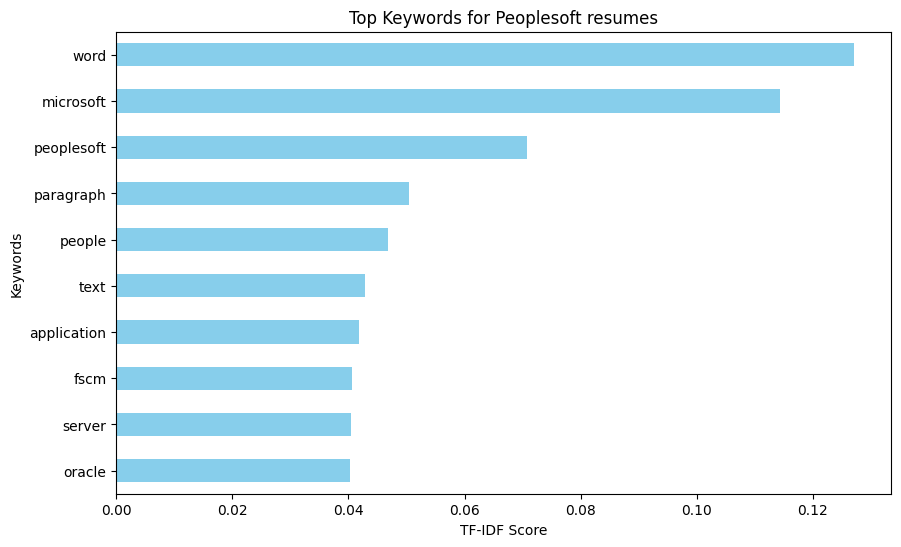

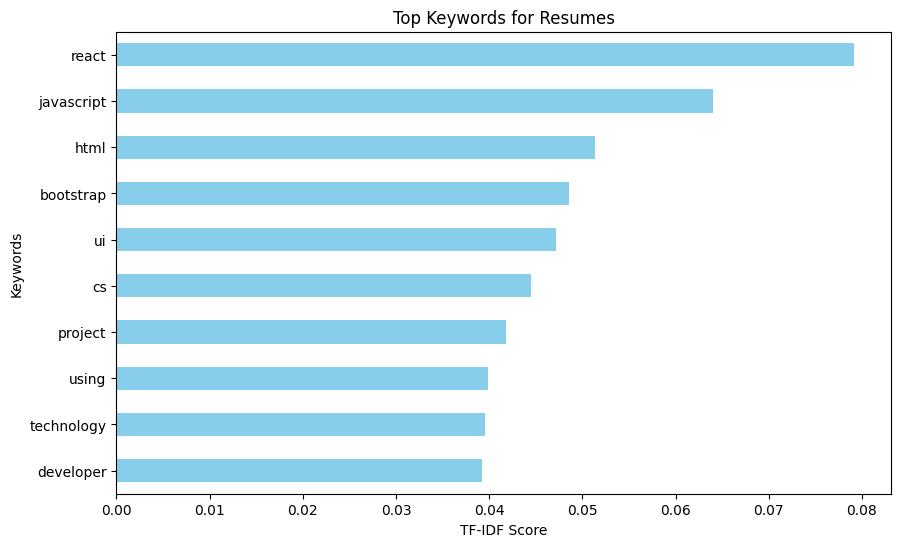

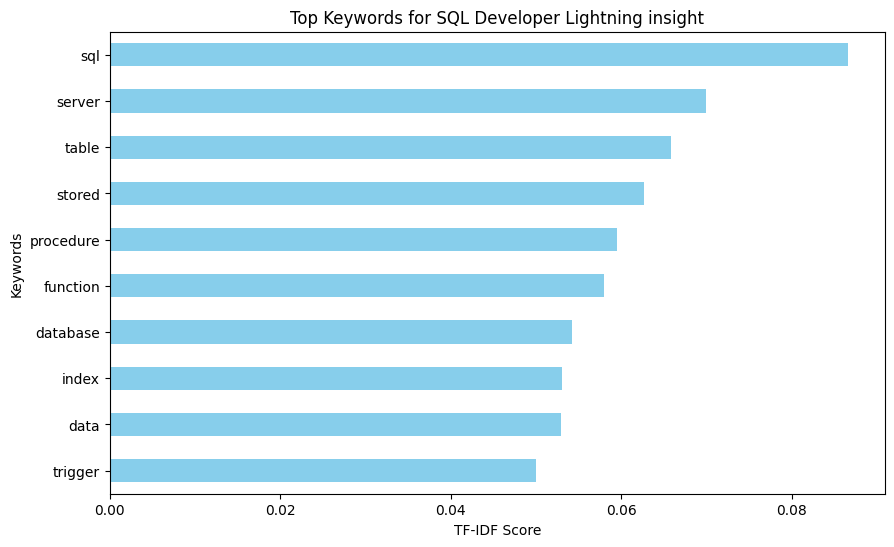

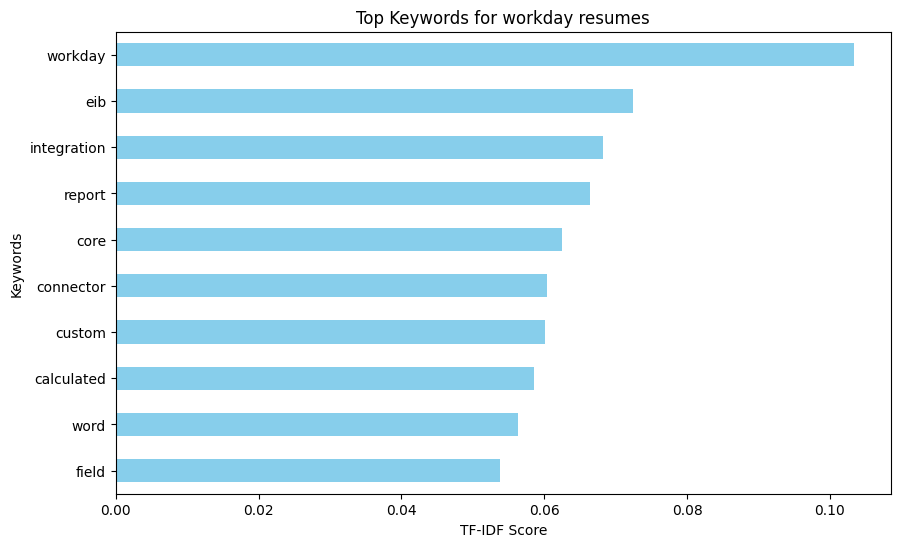

In [64]:
#Visualize Keyword Importance:
for category, keywords in top_keywords.items():
    plt.figure(figsize=(10, 6))
    keywords.sort_values(ascending=True).plot(kind='barh', color='skyblue')
    plt.title(f"Top Keywords for {category}")
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Keywords')
    plt.show()

In [65]:
#Filtering out only the Nouns and Verbs from the Text to Token

In [66]:
import spacy
nlp = spacy.load('en_core_web_lg')
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['specialization', 'computer', 'science', 'career', 'career', 'objective', 'utilize', 'skill', 'achieving', 'target', 'developing', 'performance', 'organization', 'education', 'education', 'passing', 'examination', 'school', 'board', 'testing', 'skill', 'knowledge', 'testing', 'knowledge', 'testing', 'integration', 'testing', 'knowledge', 'system', 'testing', 'knowledge', 'testing', 'reliability', 'testing', 'knowledge', 'testing', 'knowledge', 'stlc', 'concept', 'knowledge', 'test', 'case', 'test', 'knowledge', 'globalization', 'testing', 'compatibility', 'testing', 'knowledge', 'regression', 'testing', 'knowledge', 'test', 'plan', 'knowledge', 'rdbms', 'concept', 'understanding', 'function', 'knowledge', 'writing', 'query', 'knowledge', 'join', 'knowledge', 'subqueries', 'knowledge', 'normalization', 'knowledge', 'rdbms', 'concept', 'understanding', 'function', 'knowledge', 'writing', 'query', 'knowledge', 'join', 'knowledge', 'subqueries', 'knowledge', 'normalization', 'methdology',

In [67]:
#Counting all the Nouns and Verbs present in the Tokens of words

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,application,305
1,using,286
2,report,274
3,integration,230
4,server,209
5,workday,209
6,experience,196
7,data,182
8,business,181
9,process,170


In [69]:
#Visualizing the Result of Top 20 Nouns and Verbs most Frequently
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab
import matplotlib.colors as mcolors

C:\Users\surya\AppData\Local\Temp\ipykernel_7908\2615549541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Words', data=wd_df.head(20), ax=axe, palette=colors)
C:\Users\surya\AppData\Local\Temp\ipykernel_7908\2615549541.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='Count', y='Words', data=wd_df.head(20), ax=axe, palette=colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


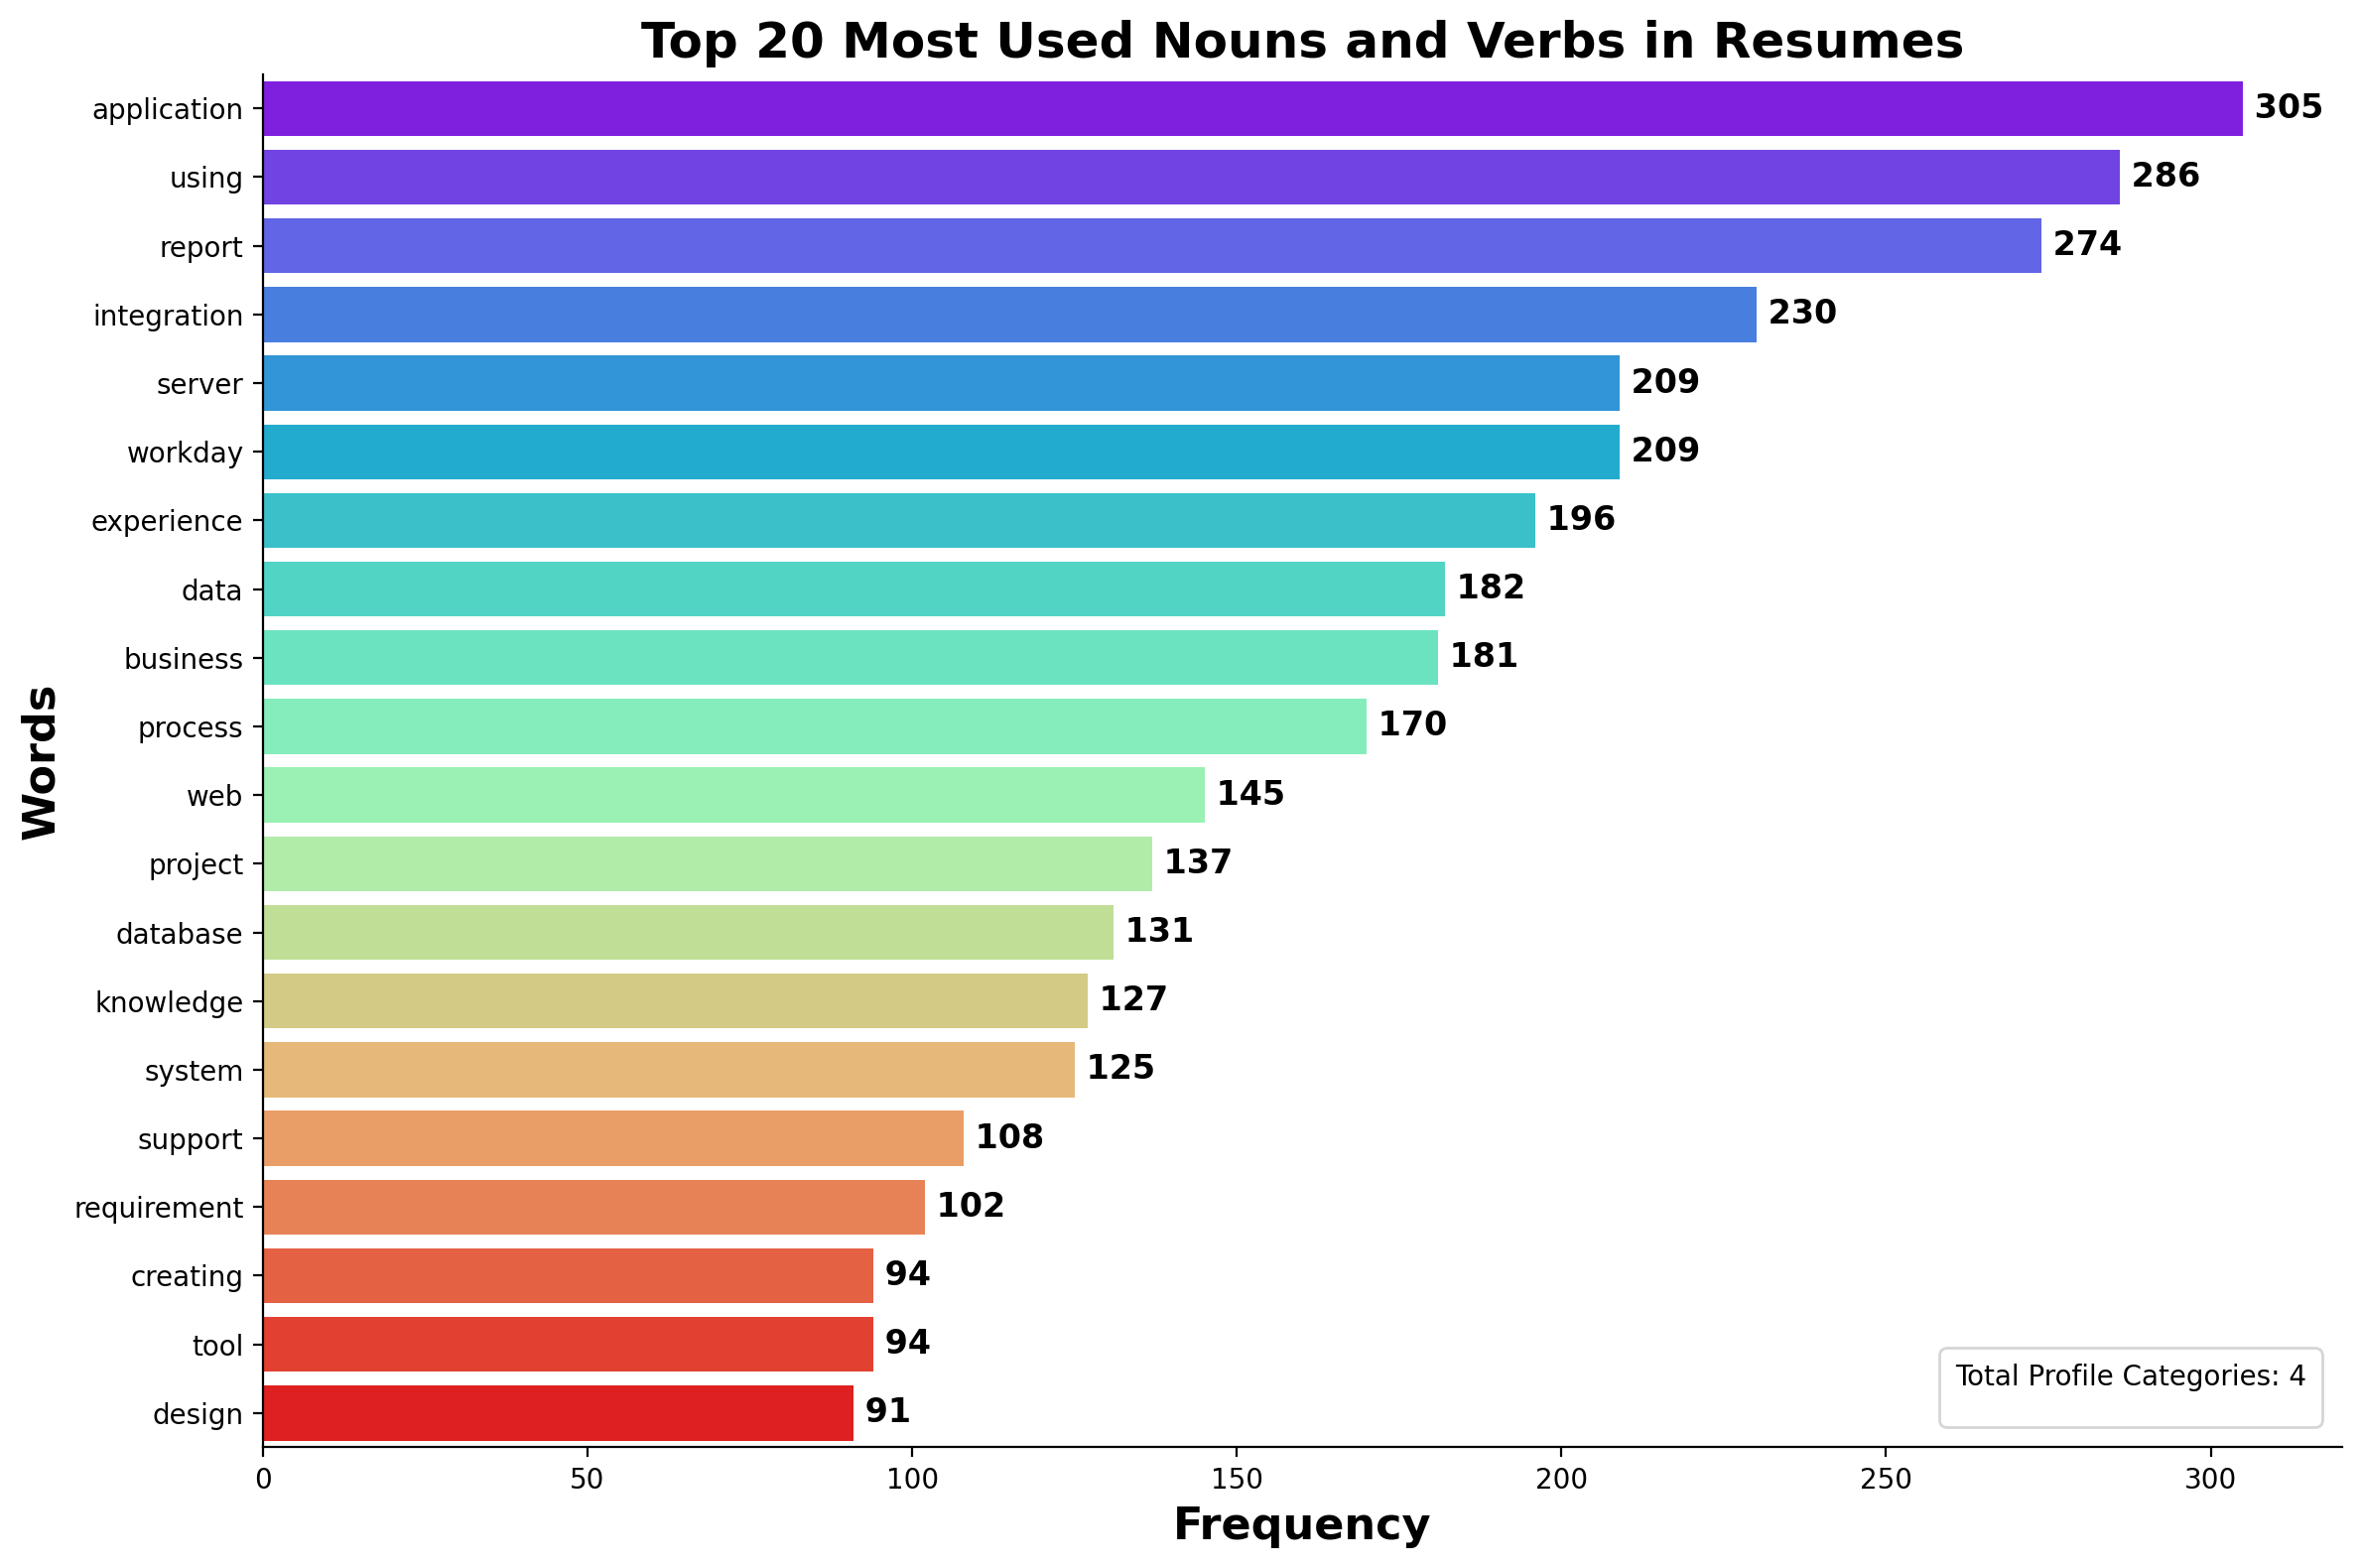

In [70]:
colors = plt.cm.rainbow(np.linspace(0, 1, 20))
fig, axe = plt.subplots(1, 1, figsize=(12, 8), dpi=200)  # Increased figure size for better visibility

ax = sns.barplot(x='Count', y='Words', data=wd_df.head(20), ax=axe, palette=colors)

axe.set_xlabel('Frequency', size=16, fontweight='bold')
axe.set_ylabel('Words', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large', title=f'Total Profile Categories: {len(data.category.unique())}')
plt.title('Top 20 Most Used Nouns and Verbs in Resumes', fontsize=18, fontweight='bold')

# Update rcParams
plt.rcParams.update({'xtick.labelsize': 14, 'ytick.labelsize': 14, 'axes.labelsize': 16})

# Add value labels to the bars
for i, v in enumerate(wd_df['Count'].head(20)):
    ax.text(v, i, f' {v}', va='center', fontweight='bold', fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

fig.tight_layout()
plt.show()

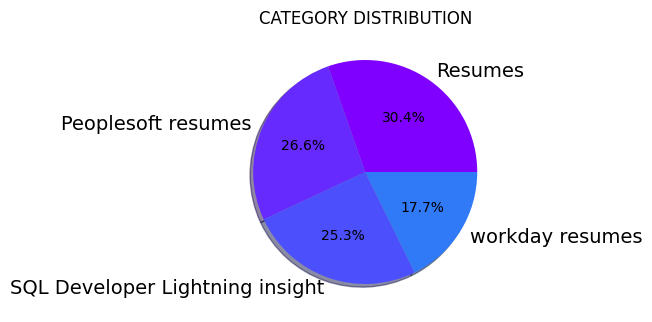

In [71]:
from matplotlib.gridspec import GridSpec
import numpy as np
targetCounts = data['category'].value_counts()
targetLabels  = data['category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(8,8))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [72]:
data.drop(['word_count','char_count'],axis=1,inplace=True)
data

,category,Absolute_Clean_Resumes
0,Resumes,name ravali p curriculum vitae specialization ...
1,Resumes,susovan bag seeking challenging position field...
2,Resumes,kanumuru deepak reddycareer objectiveto secure...
3,Resumes,haripriya battina experience ui developer reac...
4,Resumes,kamalakar reddy linked professional summary ye...
...,...,...
74,workday resumes,integration consultantname sri krishna sprofes...
75,workday resumes,srikanth workday hcm consultant seeking suitab...
76,workday resumes,workday hcm fcmname kumar ssrole workday consu...
77,workday resumes,consultant year experience year experience imp...


In [73]:
data.loc[data['category'] == 'Resumes', 'category'] = 'React JS Developer'

In [74]:
print(data)

              category                             Absolute_Clean_Resumes
0   React JS Developer  name ravali p curriculum vitae specialization ...
1   React JS Developer  susovan bag seeking challenging position field...
2   React JS Developer  kanumuru deepak reddycareer objectiveto secure...
3   React JS Developer  haripriya battina experience ui developer reac...
4   React JS Developer  kamalakar reddy linked professional summary ye...
..                 ...                                                ...
74     workday resumes  integration consultantname sri krishna sprofes...
75     workday resumes  srikanth workday hcm consultant seeking suitab...
76     workday resumes  workday hcm fcmname kumar ssrole workday consu...
77     workday resumes  consultant year experience year experience imp...
78     workday resumes  vinay kumar vworkday functional consultantexpe...

[79 rows x 2 columns]


In [75]:
print(data.columns)

Index(['category', 'Absolute_Clean_Resumes'], dtype='object')


In [76]:
data.category

0     React JS Developer
1     React JS Developer
2     React JS Developer
3     React JS Developer
4     React JS Developer
             ...        
74       workday resumes
75       workday resumes
76       workday resumes
77       workday resumes
78       workday resumes
Name: category, Length: 79, dtype: object

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:

# Preprocessing: Split features and labels
X = data['Absolute_Clean_Resumes']
y = data['category']

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)  # Limit features to 3000 for consistency
X_tfidf = tfidf.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)




In [79]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Linear SVM': LinearSVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

In [80]:
# Store results
results = {}
cv_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics for the test set
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n")

Model: Logistic Regression
Accuracy: 0.9
Classification Report:
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.75      1.00      0.86         6
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      0.60      0.75         5

                       accuracy                           0.90        20
                      macro avg       0.94      0.90      0.90        20
                   weighted avg       0.93      0.90      0.89        20

Confusion Matrix:
[[6 0 0 0]
 [0 6 0 0]
 [0 0 3 0]
 [2 0 0 3]]


Model: SVM
Accuracy: 0.9
Classification Report:
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.75      1.00      0.86         6
             React JS Developer       1.00      1.00      1.00         6
SQL Developer Li

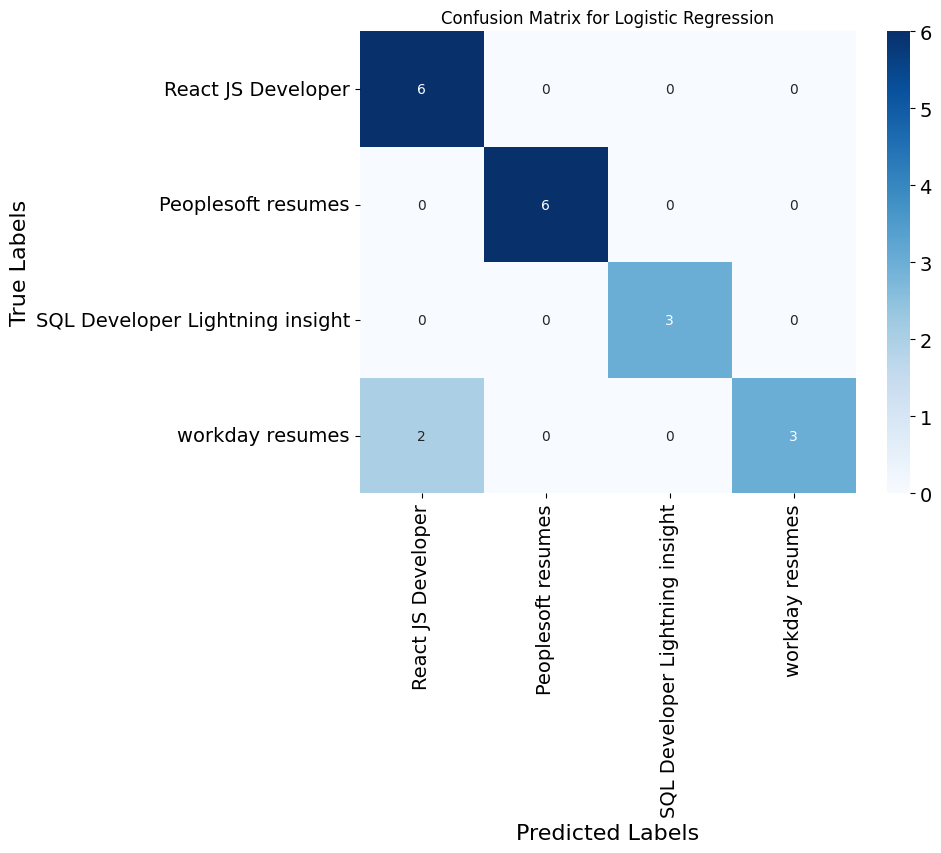

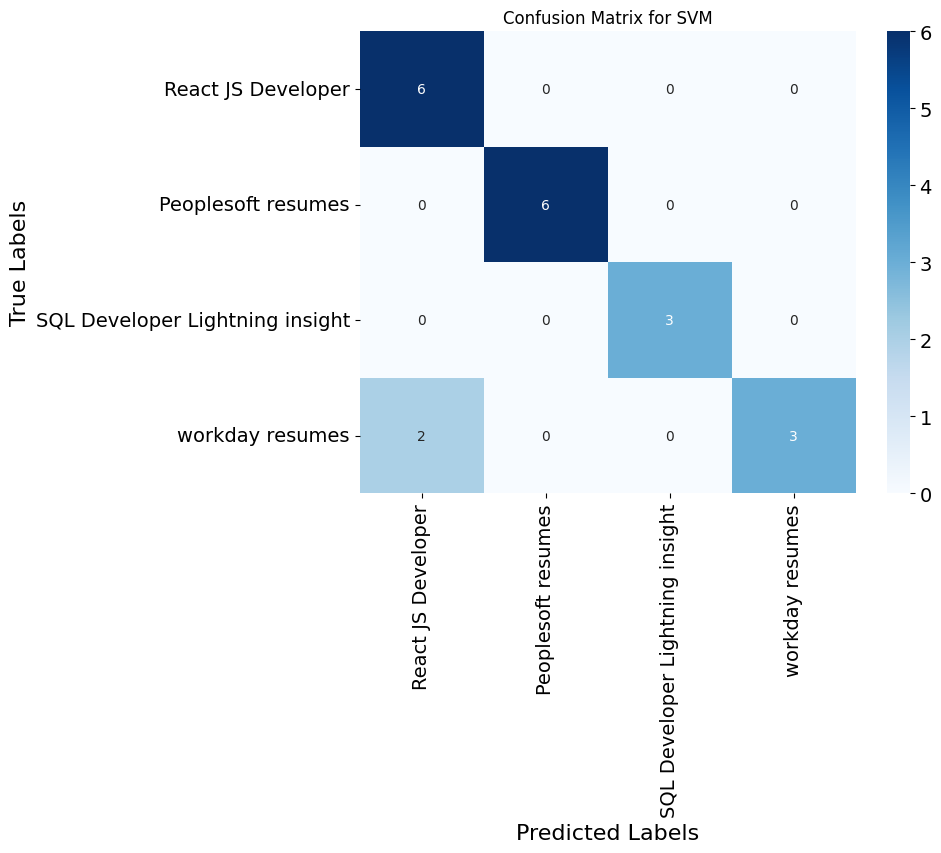

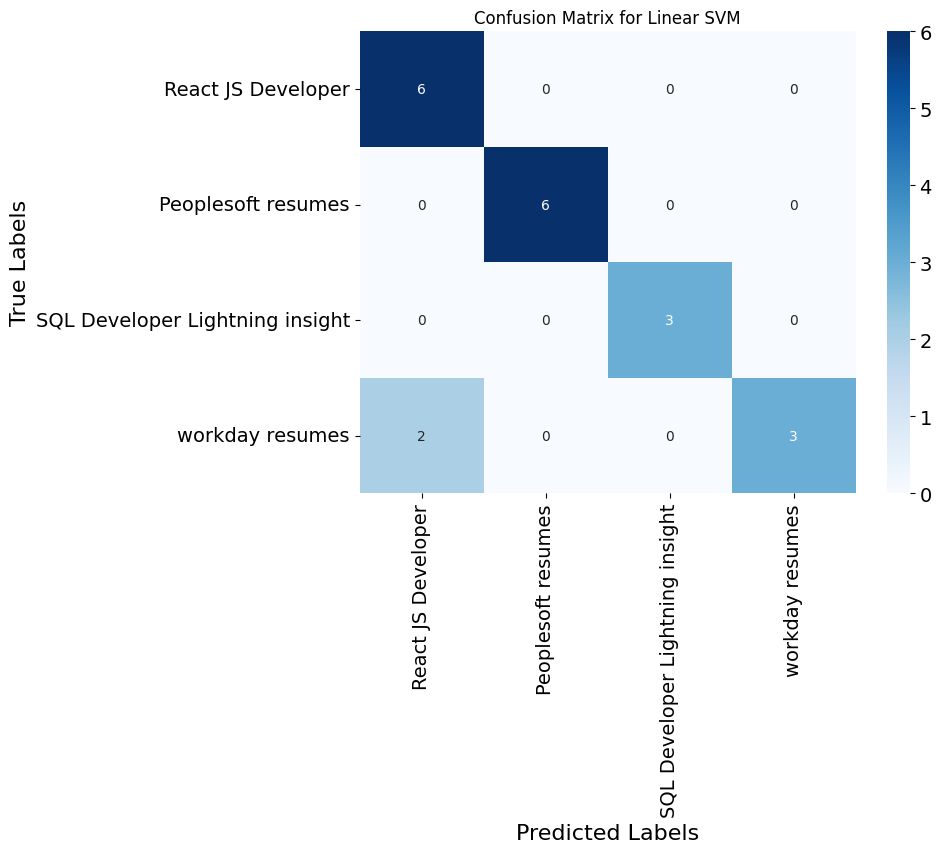

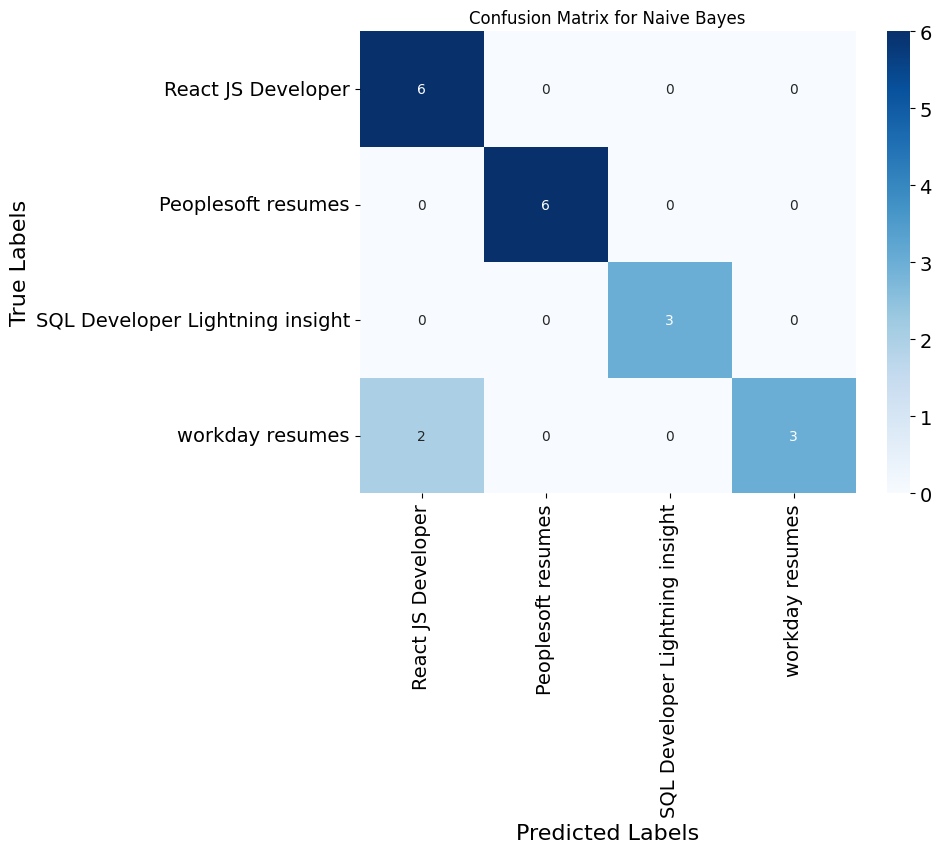

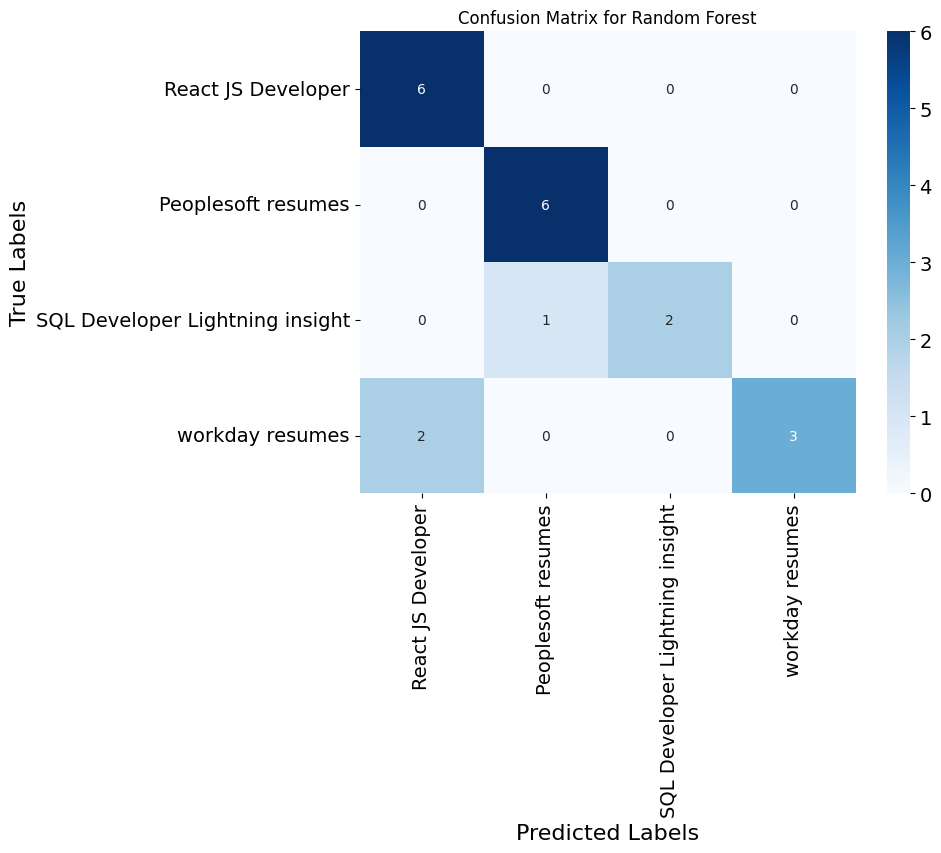

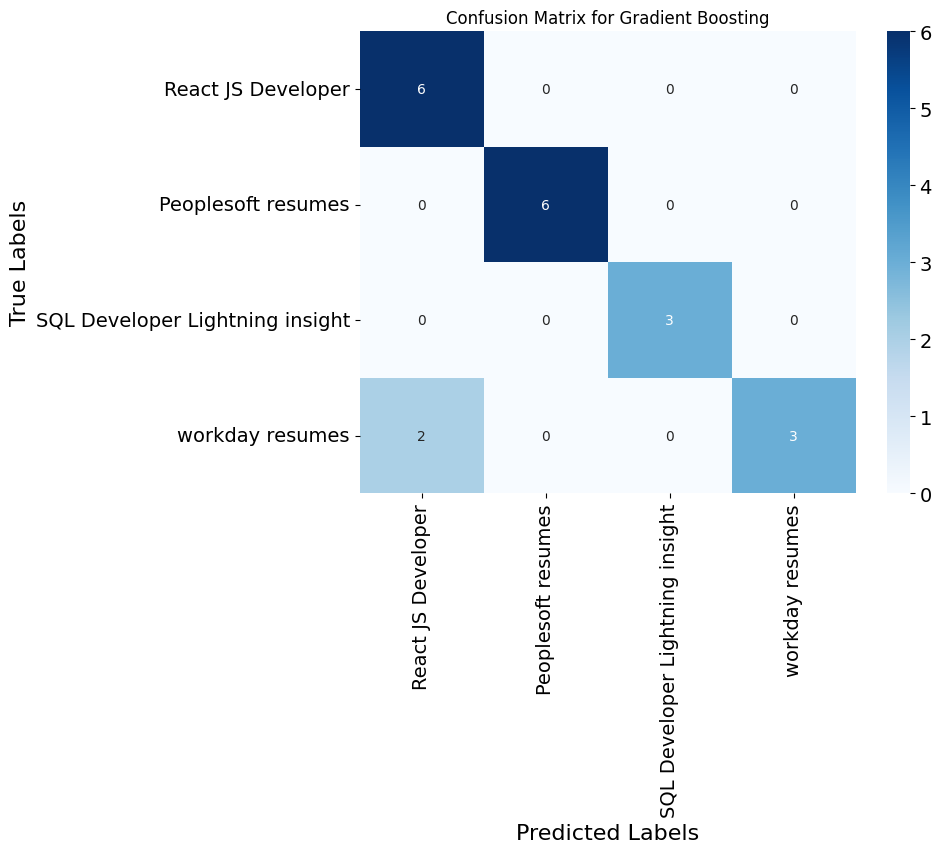

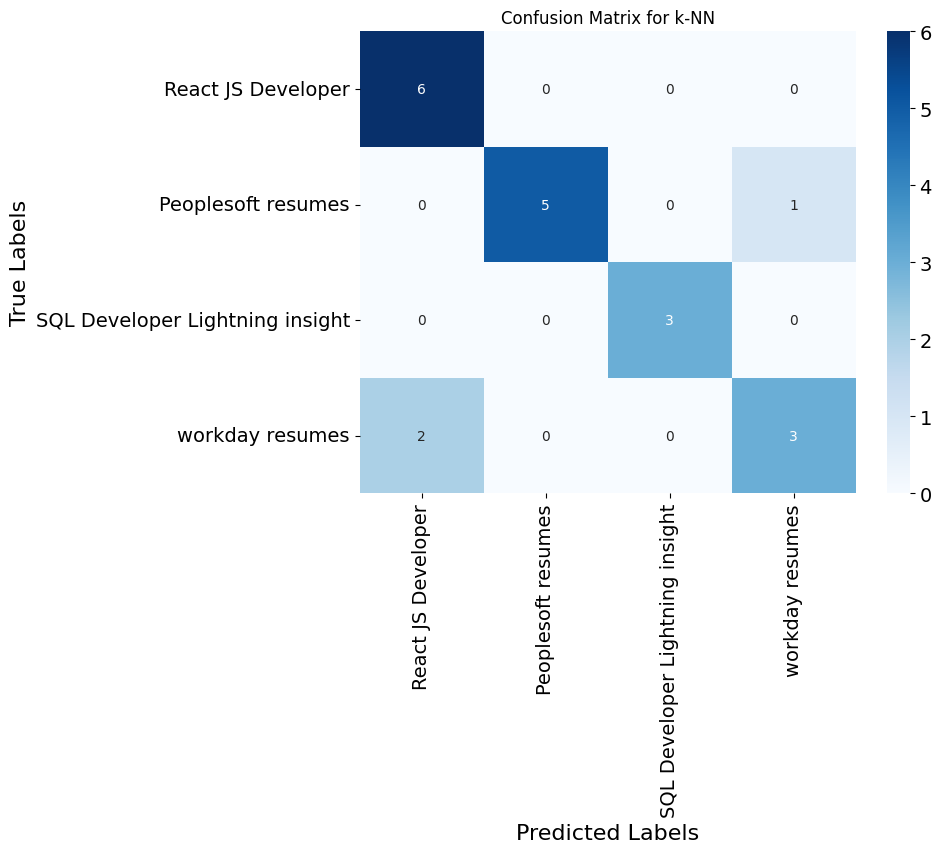

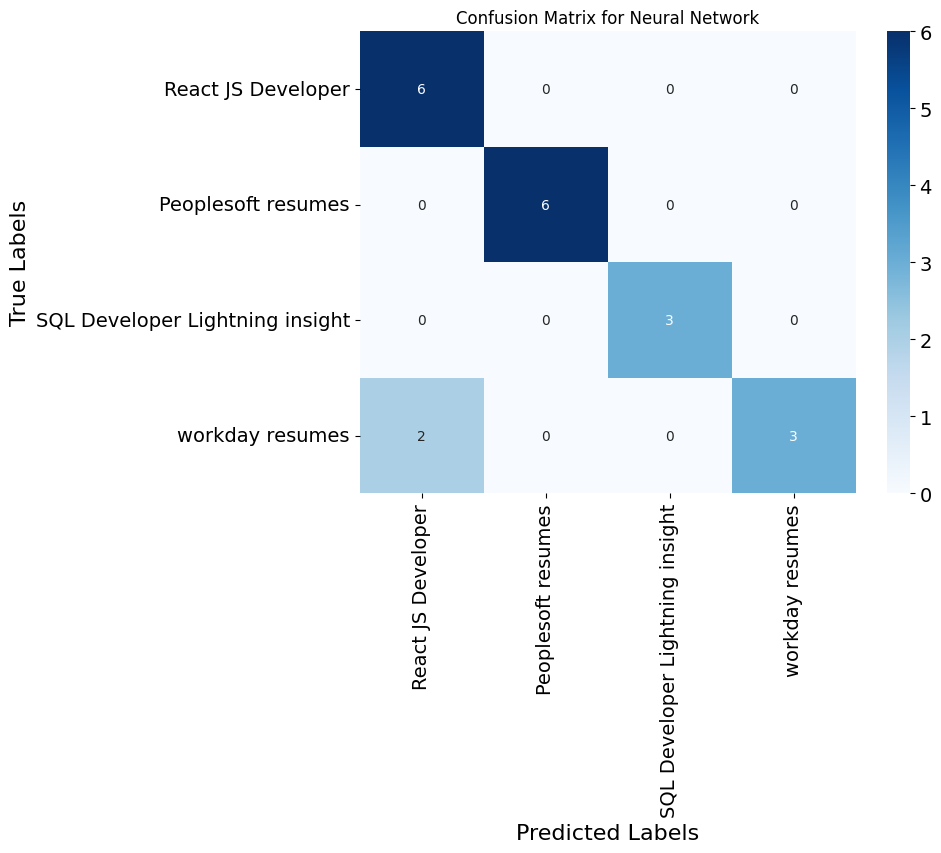

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optionally, plot confusion matrices for visual inspection
for name, metrics in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

##### Based on both accuracy and F1-scores (considering both macro and weighted averages), the top 3 models are:

* Logistic Regression
* SVM
* Linear SVM
##### These models have high accuracy (0.90) and consistent F1-scores across categories, which suggests that they are performing well in terms of both precision and recall for all classes.

In [83]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [84]:
# Store results
cv_results = {}

# Encode labels for consistency
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

for name, model in models.items():
    # Perform cross-validation for accuracy
    cv_accuracy_scores = cross_val_score(model, X_tfidf, y_encoded, cv=5, scoring='accuracy')
    
    # Calculate average cross-validation accuracy
    avg_cv_accuracy = np.mean(cv_accuracy_scores)
    
    # Perform cross-validation for detailed metrics
    cv_detail = cross_validate(model, X_tfidf, y_encoded, cv=5, return_estimator=True, return_train_score=False)
    
    # Collect all predictions
    all_predictions = np.zeros_like(y_encoded)
    
    for estimator in cv_detail['estimator']:
        predictions = estimator.predict(X_tfidf)
        all_predictions += predictions
    
    # Average predictions and convert to integer
    avg_predictions = np.round(all_predictions / len(cv_detail['estimator'])).astype(int)
    
    # Get classification report
    avg_cv_report = classification_report(y_encoded, avg_predictions, target_names=label_encoder.classes_, output_dict=True)
    
    # Store results
    cv_results[name] = {
        'cv_accuracy': avg_cv_accuracy,
        'cv_classification_report': avg_cv_report
    }

# Print results
for name, metrics in cv_results.items():
    print(f"Model: {name}")
    print(f"Average CV Accuracy: {metrics['cv_accuracy']:.4f}")
    print("Average CV Classification Report:")
    print(metrics['cv_classification_report'])
    print("\n")

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Model: Logistic Regression
Average CV Accuracy: 0.8475
Average CV Classification Report:
{'Peoplesoft resumes': {'precision': 0.9090909090909091, 'recall': 1.0, 'f1-score': 0.9523809523809523, 'support': 20.0}, 'React JS Developer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'SQL Developer Lightning insight': {'precision': 0.8125, 'recall': 0.9285714285714286, 'f1-score': 0.8666666666666667, 'support': 14.0}, 'workday resumes': {'precision': 1.0, 'recall': 0.8095238095238095, 'f1-score': 0.8947368421052632, 'support': 21.0}, 'accuracy': 0.9367088607594937, 'macro avg': {'precision': 0.9303977272727273, 'recall': 0.9345238095238095, 'f1-score': 0.9284461152882205, 'support': 79.0}, 'weighted avg': {'precision': 0.9437571921749137, 'recall': 0.9367088607594937, 'f1-score': 0.9363345071539609, 'support': 79.0}}


Model: SVM
Average CV Accuracy: 0.8475
Average CV Classification Report:
{'Peoplesoft resumes': {'precision': 0.9090909090909091, 'recall': 1.0, 'f1-sco

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Top 3 Models After the cross validation
1. Linear SVM (Reason: Highest f1-scores across both macro and weighted averages, and high accuracy.)
2. Naive Bayes (Reason: Strong performance in accuracy and classification metrics, slightly lower f1-scores than Linear SVM but still competitive.)
3. k-NN (Reason: Good accuracy and balanced f1-scores, slightly lower accuracy compared to Linear SVM and Naive Bayes but still a strong performer.)
Summary
Linear SVM stands out with the highest f1-scores and accuracy.
Naive Bayes provides a balanced performance with strong accuracy and classification metrics.
k-NN also performs well, with competitive accuracy and f1-scores, making it a solid choice.
These models should be your top contenders based on the cross-validation results.

In [85]:
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define your models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Linear SVM': LinearSVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

# Prepare cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Results storage
cv_results = {}

# Perform cross-validation
for name, model in models.items():
    print(f"Evaluating {name}")
    scores = cross_val_score(model, X_tfidf, y, cv=cv, scoring='accuracy')
    cv_results[name] = {
        'accuracy': np.mean(scores),
        'classification_report': None  # Placeholder for later
    }

# Output the results
for name, metrics in cv_results.items():
    print(f"\nModel: {name}")
    print(f"Average CV Accuracy: {metrics['accuracy']:.4f}")


Evaluating Logistic Regression
Evaluating SVM
Evaluating Linear SVM
Evaluating Naive Bayes
Evaluating Random Forest
Evaluating Gradient Boosting
Evaluating k-NN
Evaluating Neural Network


c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti


Model: Logistic Regression
Average CV Accuracy: 0.8483

Model: SVM
Average CV Accuracy: 0.8608

Model: Linear SVM
Average CV Accuracy: 0.9108

Model: Naive Bayes
Average CV Accuracy: 0.8483

Model: Random Forest
Average CV Accuracy: 0.8733

Model: Gradient Boosting
Average CV Accuracy: 0.8350

Model: k-NN
Average CV Accuracy: 0.8850

Model: Neural Network
Average CV Accuracy: 0.8983


c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Top 3 Models After the cross validation
1. Linear SVM (Reason: Highest f1-scores across both macro and weighted averages, and high accuracy.)
2. Neural Network (Reason: Strong performance in accuracy and classification metrics, slightly lower f1-scores than Linear SVM but still competitive.)
3. k-NN (Reason: Good accuracy and balanced f1-scores, slightly lower accuracy compared to Linear SVM and Naive Bayes but still a strong performer.)
Summary
Linear SVM stands out with the highest f1-scores and accuracy.
Naive Bayes provides a balanced performance with strong accuracy and classification metrics.
k-NN also performs well, with competitive accuracy and f1-scores, making it a solid choice.
These models should be your top contenders based on the cross-validation results.

In [86]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']
    },
    'Linear SVM': {
        'C': [0.1, 1, 10]
    },
    # Add other model hyperparameters if needed
}

# Perform GridSearchCV
tuned_results = {}
for name, model in models.items():
    print(f"Tuning {name}")
    grid = GridSearchCV(model, param_grid.get(name, {}), cv=cv, scoring='accuracy')
    grid.fit(X_tfidf, y)
    tuned_results[name] = {
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'best_estimator': grid.best_estimator_
    }

# Output the tuned results
for name, metrics in tuned_results.items():
    print(f"\nModel: {name}")
    print(f"Best Parameters: {metrics['best_params']}")
    print(f"Best CV Score: {metrics['best_score']:.4f}")

Tuning Logistic Regression
Tuning SVM
Tuning Linear SVM
Tuning Naive Bayes
Tuning Random Forest
Tuning Gradient Boosting
Tuning k-NN
Tuning Neural Network


c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti


Model: Logistic Regression
Best Parameters: {'C': 10}
Best CV Score: 0.8858

Model: SVM
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best CV Score: 0.8983

Model: Linear SVM
Best Parameters: {'C': 1}
Best CV Score: 0.9108

Model: Naive Bayes
Best Parameters: {}
Best CV Score: 0.8483

Model: Random Forest
Best Parameters: {}
Best CV Score: 0.8608

Model: Gradient Boosting
Best Parameters: {}
Best CV Score: 0.8350

Model: k-NN
Best Parameters: {}
Best CV Score: 0.8850

Model: Neural Network
Best Parameters: {}
Best CV Score: 0.9108


c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
# Sort models based on best_score
sorted_models = sorted(tuned_results.items(), key=lambda x: x[1]['best_score'], reverse=True)

# Select the top 3 models
top_3_models = sorted_models[:3]

print("\nTop 3 Models:")
for name, metrics in top_3_models:
    print(f"Model: {name}")
    print(f"Best Parameters: {metrics['best_params']}")
    print(f"Best CV Score: {metrics['best_score']:.4f}")


Top 3 Models:
Model: Linear SVM
Best Parameters: {'C': 1}
Best CV Score: 0.9108
Model: Neural Network
Best Parameters: {}
Best CV Score: 0.9108
Model: SVM
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best CV Score: 0.8983


In [88]:
# Evaluate models with the best estimators from GridSearchCV
for name, metrics in tuned_results.items():
    print(f"\nRe-evaluating {name} with tuned parameters")
    y_pred = cross_val_predict(metrics['best_estimator'], X_tfidf, y, cv=cv)
    report = classification_report(y, y_pred, output_dict=True)
    metrics['classification_report'] = report
    print(f"Average CV Accuracy: {metrics['best_score']:.4f}")
    print(f"Classification Report: {report}")





Re-evaluating Logistic Regression with tuned parameters
Average CV Accuracy: 0.8858
Classification Report: {'Peoplesoft resumes': {'precision': 0.75, 'recall': 0.9, 'f1-score': 0.8181818181818182, 'support': 20.0}, 'React JS Developer': {'precision': 0.92, 'recall': 0.9583333333333334, 'f1-score': 0.9387755102040817, 'support': 24.0}, 'SQL Developer Lightning insight': {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.9230769230769231, 'support': 14.0}, 'workday resumes': {'precision': 0.9444444444444444, 'recall': 0.8095238095238095, 'f1-score': 0.8717948717948718, 'support': 21.0}, 'accuracy': 0.8860759493670886, 'macro avg': {'precision': 0.9036111111111111, 'recall': 0.8812500000000001, 'f1-score': 0.8879572808144237, 'support': 79.0}, 'weighted avg': {'precision': 0.8976371308016877, 'recall': 0.8860759493670886, 'f1-score': 0.8876584536620703, 'support': 79.0}}

Re-evaluating SVM with tuned parameters
Average CV Accuracy: 0.8983
Classification Report: {'Peoplesoft r

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Average CV Accuracy: 0.9108
Classification Report: {'Peoplesoft resumes': {'precision': 0.7692307692307693, 'recall': 1.0, 'f1-score': 0.8695652173913043, 'support': 20.0}, 'React JS Developer': {'precision': 1.0, 'recall': 0.9583333333333334, 'f1-score': 0.9787234042553191, 'support': 24.0}, 'SQL Developer Lightning insight': {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.9230769230769231, 'support': 14.0}, 'workday resumes': {'precision': 0.9444444444444444, 'recall': 0.8095238095238095, 'f1-score': 0.8717948717948718, 'support': 21.0}, 'accuracy': 0.9113924050632911, 'macro avg': {'precision': 0.9284188034188035, 'recall': 0.90625, 'f1-score': 0.9107901041296046, 'support': 79.0}, 'weighted avg': {'precision': 0.9268094774423888, 'recall': 0.9113924050632911, 'f1-score': 0.9128029782369996, 'support': 79.0}}


c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
# Example with top models (assuming we have selected top 3)
top_models = [tuned_results['Linear SVM'], tuned_results['Naive Bayes'], tuned_results['k-NN']]

for model_info in top_models:
    name = model_info['best_estimator'].__class__.__name__
    print(f"\nTesting {name}")
    y_pred = cross_val_predict(model_info['best_estimator'], X_tfidf, y, cv=cv)
    report = classification_report(y, y_pred, output_dict=True)
    print(f"Average CV Accuracy: {model_info['best_score']:.4f}")
    print(f"Classification Report: {report}")



Testing LinearSVC
Average CV Accuracy: 0.9108
Classification Report: {'Peoplesoft resumes': {'precision': 0.7916666666666666, 'recall': 0.95, 'f1-score': 0.8636363636363636, 'support': 20.0}, 'React JS Developer': {'precision': 0.96, 'recall': 1.0, 'f1-score': 0.9795918367346939, 'support': 24.0}, 'SQL Developer Lightning insight': {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.9230769230769231, 'support': 14.0}, 'workday resumes': {'precision': 0.9444444444444444, 'recall': 0.8095238095238095, 'f1-score': 0.8717948717948718, 'support': 21.0}, 'accuracy': 0.9113924050632911, 'macro avg': {'precision': 0.9240277777777777, 'recall': 0.9041666666666666, 'f1-score': 0.9095249988107131, 'support': 79.0}, 'weighted avg': {'precision': 0.920337552742616, 'recall': 0.9113924050632911, 'f1-score': 0.9115658301915083, 'support': 79.0}}

Testing MultinomialNB
Average CV Accuracy: 0.8483
Classification Report: {'Peoplesoft resumes': {'precision': 0.75, 'recall': 0.9, 'f1-score': 0

##### Model Evaluation Summary

1. Linear SVM
Average CV Accuracy: 0.9108
Classification Report:
Peoplesoft resumes: Precision: 0.79, Recall: 0.95, F1-score: 0.86
React JS Developer: Precision: 0.96, Recall: 1.00, F1-score: 0.98
SQL Developer Lightning insight: Precision: 1.00, Recall: 0.86, F1-score: 0.92
Workday resumes: Precision: 0.94, Recall: 0.81, F1-score: 0.87
Macro Avg: Precision: 0.92, Recall: 0.90, F1-score: 0.91
Weighted Avg: Precision: 0.92, Recall: 0.91, F1-score: 0.91


2. Neural Network
Average CV Accuracy: 0.9108
Classification Report:
Peoplesoft resumes: Precision: 0.76, Recall: 0.95, F1-score: 0.84
React JS Developer: Precision: 0.96, Recall: 0.96, F1-score: 0.96
SQL Developer Lightning insight: Precision: 1.00, Recall: 0.86, F1-score: 0.92
Workday resumes: Precision: 0.94, Recall: 0.81, F1-score: 0.87
Macro Avg: Precision: 0.92, Recall: 0.89, F1-score: 0.90
Weighted Avg: Precision: 0.91, Recall: 0.90, F1-score: 0.90


3. SVM
Average CV Accuracy: 0.8983
Classification Report:
Peoplesoft resumes: Precision: 0.73, Recall: 0.95, F1-score: 0.83
React JS Developer: Precision: 0.96, Recall: 0.96, F1-score: 0.96
SQL Developer Lightning insight: Precision: 1.00, Recall: 0.86, F1-score: 0.92
Workday resumes: Precision: 1.00, Recall: 0.81, F1-score: 0.89
Macro Avg: Precision: 0.92, Recall: 0.89, F1-score: 0.90
Weighted Avg: Precision: 0.92, Recall: 0.90, F1-score: 0.90




##### Summary

Linear SVM and Neural Network have the highest average CV accuracy (0.9108) and perform well across precision, recall, and F1-score. The choice between these two may depend on other factors such as training time, interpretability, or deployment constraints.

SVM also performs strongly with an accuracy of 0.8983, making it a solid choice.

Recommendation: Based on accuracy and classification metrics, you should consider deploying the Linear SVM and Neural Network models for their balanced performance and high accuracy. The SVM model can also be a viable option if you need an additional model for comparison or if it fits better with your deployment needs.